<a href="https://colab.research.google.com/github/OltiGashi2003/banking_main/blob/main/banking_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


# Notwendige classifiers for building machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import xgboost

In [ ]:
df = pd.read_csv("new_train.csv")

print('Form des Datenrahmens: ',df.shape)

Form des Datenrahmens:  (32950, 16)


In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


2.2 Nach fehlenden Werten wurde gesucht, eine
geeignete Strategie zur Bereinigung gewählt und
begründet

In [ ]:
value_to_count = "unknown"
for column in df.columns:
    count = df[column].eq(value_to_count).sum()
    print(f"Column '{column}' has {count} occurrences of the value '{value_to_count}'.")

Column 'age' has 0 occurrences of the value 'unknown'.
Column 'job' has 265 occurrences of the value 'unknown'.
Column 'marital' has 65 occurrences of the value 'unknown'.
Column 'education' has 1397 occurrences of the value 'unknown'.
Column 'default' has 6940 occurrences of the value 'unknown'.
Column 'housing' has 796 occurrences of the value 'unknown'.
Column 'loan' has 796 occurrences of the value 'unknown'.
Column 'contact' has 0 occurrences of the value 'unknown'.
Column 'month' has 0 occurrences of the value 'unknown'.
Column 'day_of_week' has 0 occurrences of the value 'unknown'.
Column 'duration' has 0 occurrences of the value 'unknown'.
Column 'campaign' has 0 occurrences of the value 'unknown'.
Column 'pdays' has 0 occurrences of the value 'unknown'.
Column 'previous' has 0 occurrences of the value 'unknown'.
Column 'poutcome' has 0 occurrences of the value 'unknown'.
Column 'y' has 0 occurrences of the value 'unknown'.


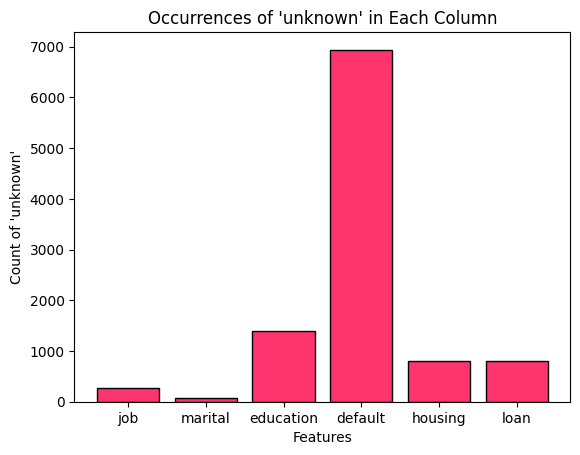

In [ ]:
colors = ['#fe346e']
sns.set_palette(sns.color_palette(colors))
occurrences = {column: df[column].eq(value_to_count).sum() for column in df.columns if df[column].eq(value_to_count).any()}
plt.bar(occurrences.keys(), occurrences.values(), edgecolor='black')
plt.xlabel("Features")
plt.ylabel(f"Count of '{value_to_count}'")
plt.title(f"Occurrences of '{value_to_count}' in Each Column")
plt.show()

In [ ]:
del df['default']

In [ ]:
df = df.replace('unknown', None)

for column in df.select_dtypes(include='object').columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('unknown', mode_value)

print("DataFrame after handling 'unknown' values:")
print(df.head())

DataFrame after handling 'unknown' values:
   age           job   marital          education housing loan    contact  \
0   49   blue-collar   married           basic.9y      no   no   cellular   
1   37  entrepreneur   married  university.degree      no   no  telephone   
2   78       retired   married           basic.4y      no   no   cellular   
3   36        admin.   married  university.degree     yes   no  telephone   
4   59       retired  divorced  university.degree      no   no   cellular   

  month day_of_week  duration  campaign  pdays  previous     poutcome    y  
0   nov         wed       227         4    999         0  nonexistent   no  
1   nov         wed       202         2    999         1      failure   no  
2   jul         mon      1148         1    999         0  nonexistent  yes  
3   may         mon       120         2    999         0  nonexistent   no  
4   jun         tue       368         2    999         0  nonexistent   no  


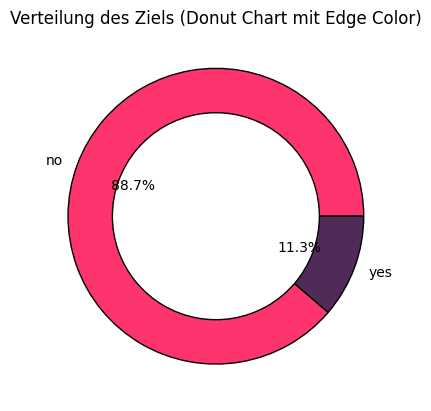

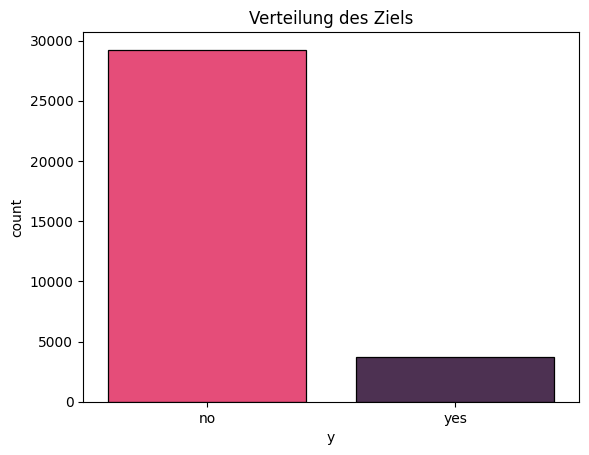

In [ ]:
# Donut Chart mit Edge Color
colors = ['#fe346e','#512b58']
plt.pie(df['y'].value_counts(), labels=df['y'].unique(), autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3, edgecolor='black'))
plt.title('Verteilung des Ziels (Donut Chart mit Edge Color)')
plt.show()


sns.countplot(x='y', data=df, palette=colors, edgecolor='black', linewidth=0.9)
plt.title('Verteilung des Ziels')
plt.show()

In [ ]:
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [ ]:
numerical_features = [i for i in df.columns if len(df[i].unique()) > 6]
categorical_features = [i for i in df.columns if i not in numerical_features]

In [ ]:
categorical_features.remove('y')

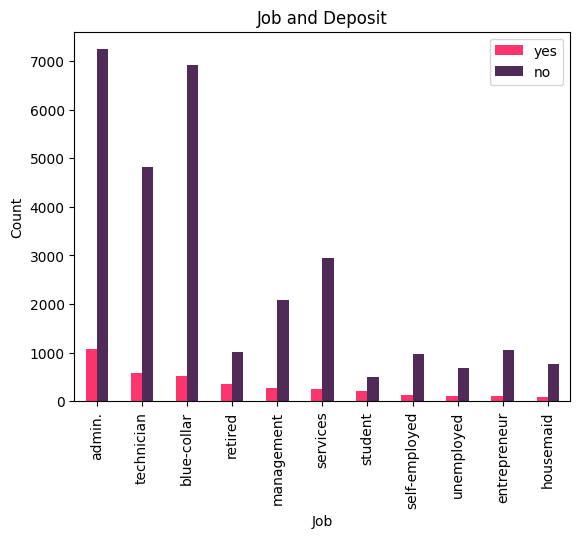

In [ ]:
job_deposit_df = pd.DataFrame()

job_deposit_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
job_deposit_df['no'] = df[df['y'] == 'no']['job'].value_counts()

# Balken mit zwei verschiedenen Farben erstellen
ax = job_deposit_df.plot.bar(title='Job and Deposit', color = ['#fe346e','#512b58'])
ax.set_ylabel('Count')
ax.set_xlabel('Job')
plt.show()

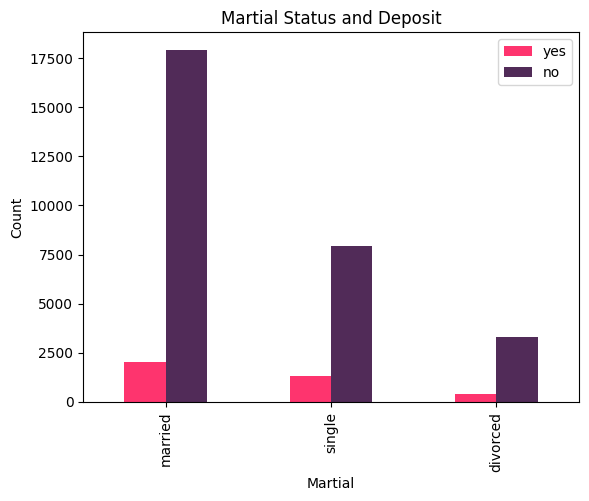

In [ ]:
martial_deposit_df = pd.DataFrame()

martial_deposit_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
martial_deposit_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

ax = martial_deposit_df.plot.bar(title='Martial Status and Deposit', color = ['#fe346e','#512b58'])
ax.set_ylabel('Count')
ax.set_xlabel('Martial')
plt.show()

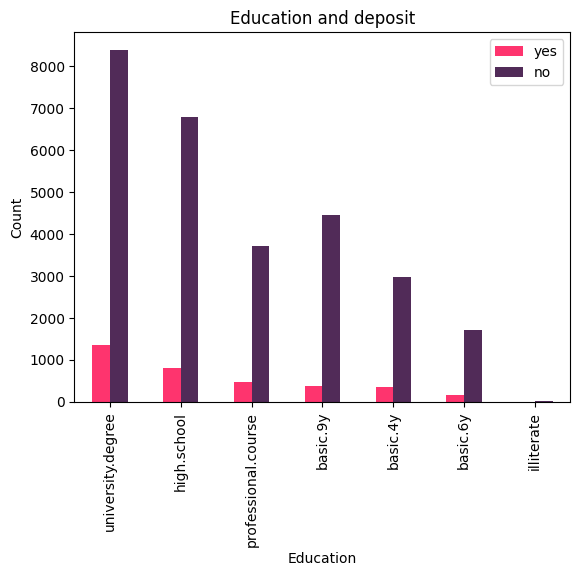

In [ ]:
education_deposit_df = pd.DataFrame()

education_deposit_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
education_deposit_df['no'] = df[df['y'] == 'no']['education'].value_counts()


ax = education_deposit_df.plot.bar(title = 'Education and deposit', color = ['#fe346e','#512b58'])
ax.set_ylabel('Count')
ax.set_xlabel('Education')
plt.show()

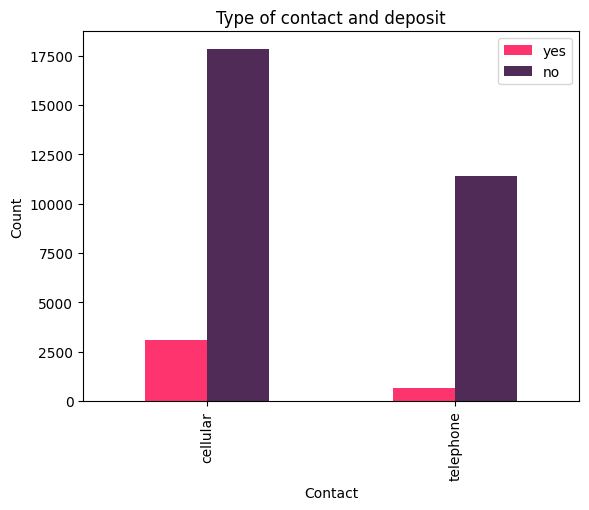

In [ ]:
#type of contact and deposit
contact_df = pd.DataFrame()

contact_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
contact_df['no'] = df[df['y'] == 'no']['contact'].value_counts()


ax = contact_df.plot.bar(title = 'Type of contact and deposit', color = ['#fe346e','#512b58'])
ax.set_ylabel('Count')
ax.set_xlabel('Contact')
plt.show()

In [ ]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,3712.000000,29238.000000
mean,40.851293,39.907825
std,13.760020,9.891657
min,17.000000,17.000000
25%,31.000000,32.000000
50%,37.000000,38.000000
75%,50.000000,47.000000
max,98.000000,91.000000


In [ ]:
#2.5 Duplikate wurden gesucht und bereinigt
num_duplicates = df.duplicated().sum()

print(f"Number of duplicates in the dataset: {num_duplicates}")
df = df.drop_duplicates()

Number of duplicates in the dataset: 9


In [ ]:
le = LabelEncoder()
text_cols = list(df.select_dtypes(include=['object']).columns)


l3 = []
l4 = []
print('Label Encoder Transformation')
for i in tqdm(text_cols):
    df[i] = le.fit_transform(df[i])
    l3.append(list(df[i].unique())); l4.append(list(le.inverse_transform(df[i].unique())))
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-25-424961ea209f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-25-424961ea209f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-25-424961ea209f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

job  :  [ 1  2  5  0  8  7  9  6  4 10 11  3]  =  ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' None 'housemaid']
marital  :  [1 0 2 3]  =  ['married' 'divorced' 'single' None]
education  :  [2 6 0 3 5 7 1 4]  =  ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' None 'basic.6y' 'illiterate']
housing  :  [0 1 2]  =  ['no' 'yes' None]
loan  :  [0 1 2]  =  ['no' 'yes' None]
contact  :  [0 1]  =  ['cellular' 'telephone']
month  :  [7 3 6 4 1 5 8 0 9 2]  =  ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week  :  [4 1 3 0 2]  =  ['wed' 'mon' 'tue' 'fri' 'thu']


100%|██████████| 10/10 [00:00<00:00, 64.78it/s]

poutcome  :  [1 0 2]  =  ['nonexistent' 'failure' 'success']
y  :  [0 1]  =  ['no' 'yes']


In [ ]:
#2.6 Features wurden standardisiert und transformiert

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
df['job'] = mms.fit_transform(df[['job']])
df['day_of_week'] = mms.fit_transform(df[['day_of_week']])
df['month'] = mms.fit_transform(df[['month']])
df['duration'] = mms.fit_transform(df[['duration']])
df['campaign'] = mms.fit_transform(df[['campaign']])
df['pdays'] = mms.fit_transform(df[['pdays']])
df['previous'] = mms.fit_transform(df[['previous']])
df['age'] = mms.fit_transform(df[['age']])


# Standardization
df['marital'] = ss.fit_transform(df[['marital']])
df['education'] = ss.fit_transform(df[['education']])
df['housing'] = ss.fit_transform(df[['housing']])
df['loan'] = ss.fit_transform(df[['loan']])
df['contact'] = ss.fit_transform(df[['contact']])
df['poutcome'] = ss.fit_transform(df[['poutcome']])
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0.395062,0.090909,-0.284937,-0.818248,-1.056448,-0.439451,-0.758929,0.777778,1.00,0.046157,0.054545,1.0,0.000000,0.193698,0
1,0.246914,0.181818,-0.284937,1.053583,-1.056448,-0.439451,1.317646,0.777778,1.00,0.041074,0.018182,1.0,0.142857,-2.551829,0
2,0.753086,0.454545,-0.284937,-1.754163,-1.056448,-0.439451,-0.758929,0.333333,0.25,0.233428,0.000000,1.0,0.000000,0.193698,1
3,0.234568,0.000000,-0.284937,1.053583,0.790514,-0.439451,1.317646,0.666667,0.25,0.024400,0.018182,1.0,0.000000,0.193698,0
4,0.518519,0.454545,-1.928161,1.053583,-1.056448,-0.439451,-0.758929,0.444444,0.75,0.074827,0.018182,1.0,0.000000,0.193698,0


In [ ]:
df_majority = df[(df['y']== 0)] # 0 heisst Nein
df_minority = df[(df['y']== 1)] # 1 heisst yes
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 29238, # to match majority class
                                 random_state=42)  # reproducible results
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

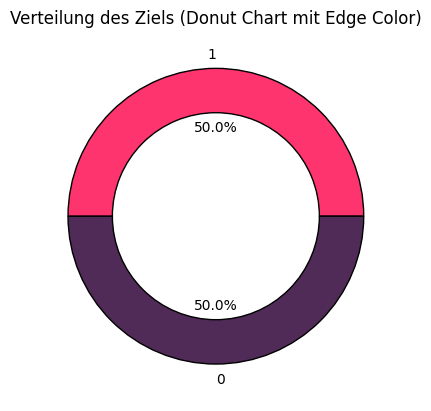

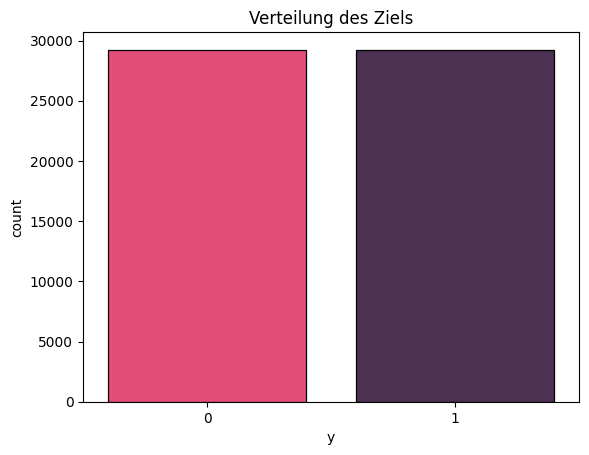

In [ ]:
# Donut Chart mit Edge Color
colors = ['#fe346e','#512b58']
plt.pie(df_upsampled['y'].value_counts(), labels=df_upsampled['y'].unique(), autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3, edgecolor='black'))
plt.title('Verteilung des Ziels (Donut Chart mit Edge Color)')
plt.show()


sns.countplot(x='y', data=df_upsampled, palette=colors, edgecolor='black', linewidth=0.9)
plt.title('Verteilung des Ziels')
plt.show()

2.7 Eine Selektion und/oder Extraktion der Features hat stattgefunden (soweit sinnvoll)

In [ ]:
contingency_tables = {}
for variable in categorical_features:
    contingency_table = pd.crosstab(df_upsampled[variable], df_upsampled['y'])
    contingency_tables[variable] = contingency_table

significant_variables = []
for variable, table in contingency_tables.items():
    chi2, p, _, _ = chi2_contingency(table)
    if p < 0.05:  # Adjust significance level as needed
        significant_variables.append(variable)
        print(f"Chi-square test for {variable}: p-value = {p:.4f} (significant)")

# List statistically significant variables
print("\nStatistically significant variables:")
print(significant_variables)

Chi-square test for marital: p-value = 0.0000 (significant)
Chi-square test for housing: p-value = 0.0247 (significant)
Chi-square test for contact: p-value = 0.0000 (significant)
Chi-square test for day_of_week: p-value = 0.0000 (significant)
Chi-square test for poutcome: p-value = 0.0000 (significant)

Statistically significant variables:
['marital', 'housing', 'contact', 'day_of_week', 'poutcome']


In [ ]:
X = df_upsampled.drop(columns = 'y')
y = df_upsampled[['y']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [85]:
def model(classifier,x_train,y_train,x_test,y_test):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    print("Cross Validation Score TRAIN: ",'{0:.2%}'.format(cross_val_score(classifier, X_train, y_train, cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    colors = ['#fe346e','#512b58']
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    # Plot der ROC-Kurve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=colors[0], lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color=colors[1], lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    accuracy = accuracy_score(y_test, y_scores)
    precision = precision_score(y_test, y_scores)
    recall = recall_score(y_test, y_scores)
    f1 = f1_score(y_test, y_scores)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [78]:
#XGBoost
classifier_xgb = xgboost.XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb, X_train, y_train, X_test, y_test)

Cross Validation Score TRAIN:  92.90%
ROC_AUC Score :  85.76%


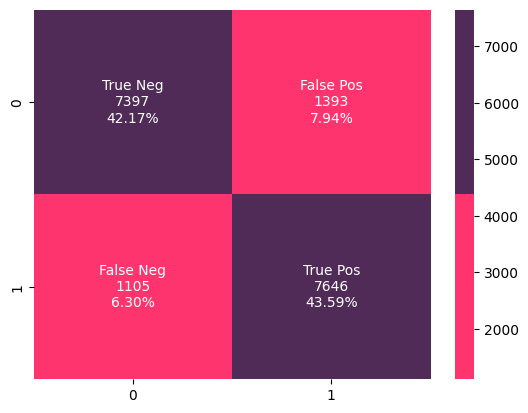

In [86]:
#XGBoost
model_evaluation(classifier_xgb, X_test, y_test)
prediction_xgb = classifier_xgb.predict(X_test)

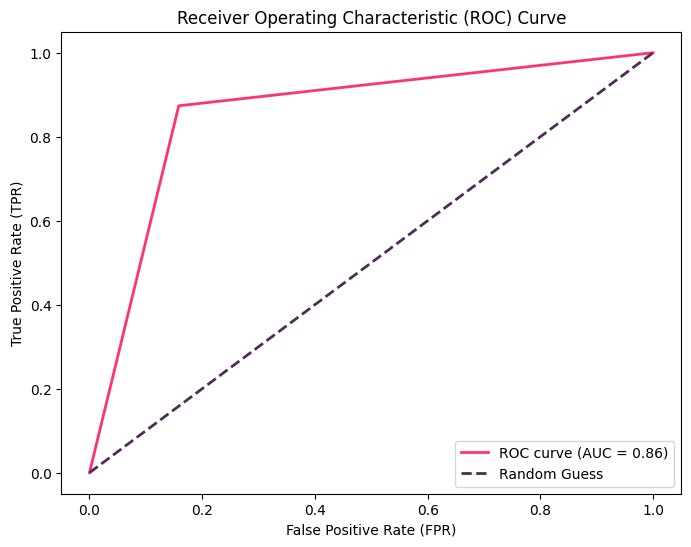

Accuracy: 0.86
Precision: 0.85
Recall: 0.87
F1 Score: 0.86


In [87]:
#XGBoost
plot_roc_curve(y_test, prediction_xgb)

In [88]:
#random forest
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf, X_train, y_train, X_test, y_test)

<ipython-input-85-c6a3d468b17e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Cross Validation Score TRAIN:  89.70%
ROC_AUC Score :  81.63%


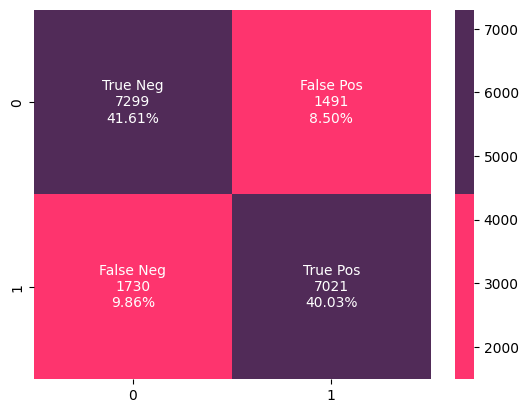

In [89]:
#Random Forest
model_evaluation(classifier_rf, X_test, y_test)

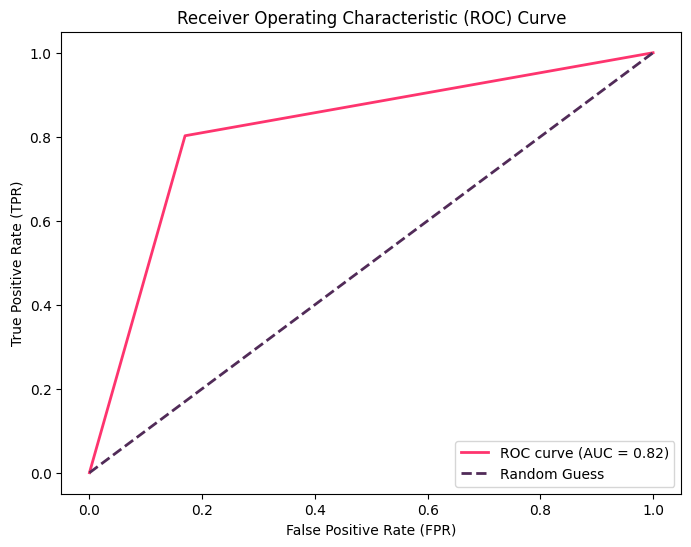

Accuracy: 0.82
Precision: 0.82
Recall: 0.80
F1 Score: 0.81


In [90]:
prediction_rf = classifier_rf.predict(X_test)
plot_roc_curve(y_test, prediction_rf)

In [94]:
#Logistic Regression
classifier_lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2')
model(classifier_lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Cross Validation Score TRAIN:  88.46%
ROC_AUC Score :  79.85%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


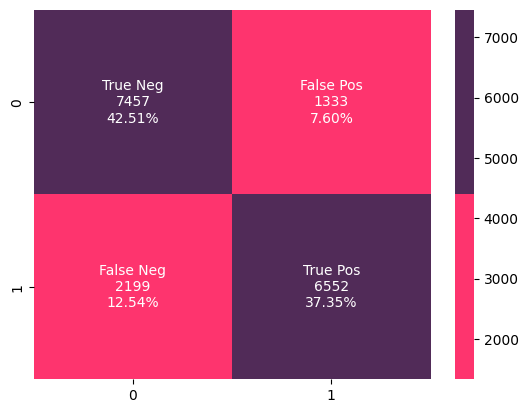

In [95]:
#Logistic Regression
model_evaluation(classifier_lr, X_test ,y_test)

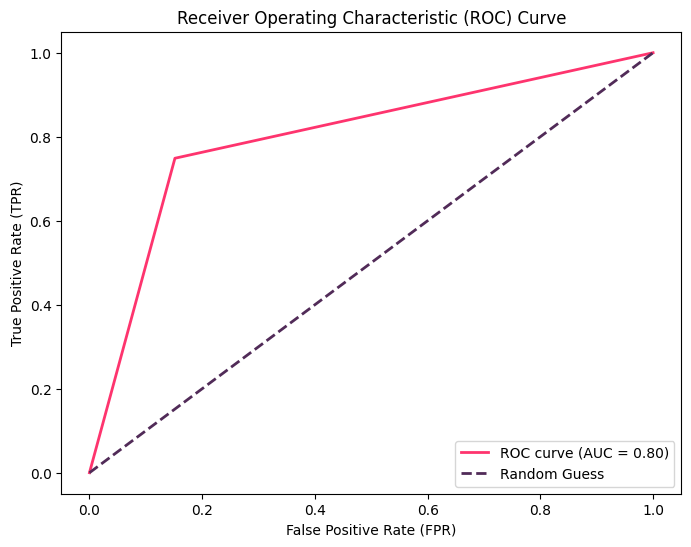

Accuracy: 0.80
Precision: 0.83
Recall: 0.75
F1 Score: 0.79


In [96]:
#Logistic Regression
prediction_lr = classifier_lr.predict(X_test)
plot_roc_curve(y_test, prediction_lr)

In [97]:
#KNN
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Cross Validation Score TRAIN:  95.46%
ROC_AUC Score :  92.56%


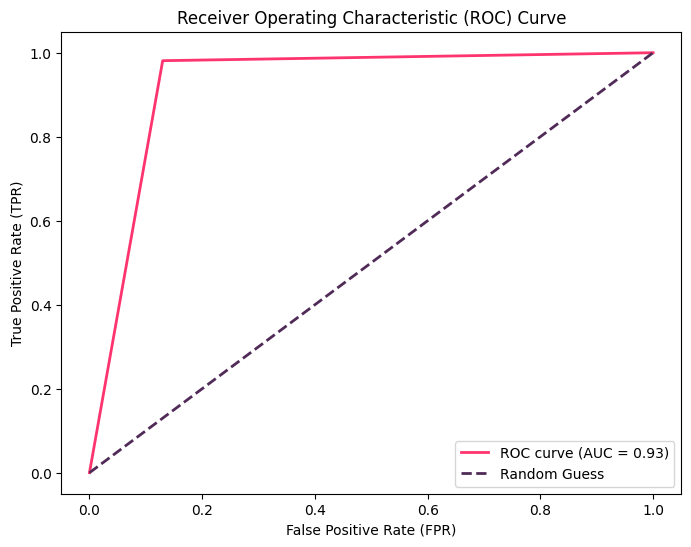

Accuracy: 0.93
Precision: 0.88
Recall: 0.98
F1 Score: 0.93


In [98]:
prediction_knn = classifier_knn.predict(X_test)
plot_roc_curve(y_test, prediction_knn)

es könnte eine leichte Überanpassung (Overfitting) geben, da die Trainingsgenauigkeit höher ist als die Validierungsgenauigkeit

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Aufteilen in Trainings- und Testdaten
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Aufteilen in Validierungs- und Testdaten
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Beispiel: Definition der neuronalen Netzwerkarchitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Beispiel: Training des Modells
model.fit(X_train, y_train, epochs= 100, batch_size=32, validation_data=(X_val, y_val))

# Beispiel: Auswertung des Modells auf Testdaten
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')




Epoch 1/100
1462/1462 [==============================] - 6s 3ms/step - loss: 0.5015 - accuracy: 0.7540 - val_loss: 0.4448 - val_accuracy: 0.7963
Epoch 2/100
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4253 - accuracy: 0.8100 - val_loss: 0.4311 - val_accuracy: 0.8002
Epoch 3/100
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.8159 - val_loss: 0.4122 - val_accuracy: 0.8153
Epoch 4/100
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4038 - accuracy: 0.8192 - val_loss: 0.4070 - val_accuracy: 0.8172
Epoch 5/100
1462/1462 [==============================] - 5s 3ms/step - loss: 0.3947 - accuracy: 0.8220 - val_loss: 0.3992 - val_accuracy: 0.8184
Epoch 6/100
1462/1462 [==============================] - 3s 2ms/step - loss: 0.3883 - accuracy: 0.8272 - val_loss: 0.3971 - val_accuracy: 0.8180
Epoch 7/100
1462/1462 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8289 - val_loss: 0.3888 - val_ac

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Annahme: Sie haben bereits Ihre Daten (X, y) geladen

# Schritt 1: Aufteilung der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Schritt 2: Aufteilung der Trainingsdaten in Trainings- und Validierungsdatensätze
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Schritt 3: Definition der Neuronalen Netzarchitektur
input_dim = X_train.shape[1]  # Anzahl der Merkmale
output_dim = len(np.unique(y_train))  # Anzahl der Klassen

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Schritt 4: Kompilierung des Modells
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Schritt 5: Training des Modells
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Schritt 6: Evaluation auf dem Testdatensatz
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100
731/731 [==============================] - 4s 4ms/step - loss: 0.5400 - accuracy: 0.7276 - val_loss: 0.4539 - val_accuracy: 0.7832
Epoch 2/100
731/731 [==============================] - 3s 4ms/step - loss: 0.4415 - accuracy: 0.8016 - val_loss: 0.4270 - val_accuracy: 0.8109
Epoch 3/100
731/731 [==============================] - 4s 6ms/step - loss: 0.4265 - accuracy: 0.8080 - val_loss: 0.4173 - val_accuracy: 0.8134
Epoch 4/100
731/731 [==============================] - 3s 5ms/step - loss: 0.4177 - accuracy: 0.8139 - val_loss: 0.4248 - val_accuracy: 0.8066
Epoch 5/100
731/731 [==============================] - 2s 3ms/step - loss: 0.4123 - accuracy: 0.8164 - val_loss: 0.4118 - val_accuracy: 0.8182
Epoch 6/100
731/731 [==============================] - 2s 3ms/step - loss: 0.4079 - accuracy: 0.8171 - val_loss: 0.4077 - val_accuracy: 0.8185
Epoch 7/100
731/731 [==============================] - 2s 3ms/step - loss: 0.4047 - accuracy: 0.8194 - val_loss: 0.4015 - val_accuracy: 0.8205

In [91]:
model1 = LogisticRegression(C=1.0, random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model3 = SVC(kernel='linear', probability=True, random_state=0)

# Schritt 3: Definition des Voting-Ensemble-Modells
ensemble_model = VotingClassifier(estimators=[
    ('logistic', model1),
    ('random_forest', model2),
    ('svm', model3)
], voting='soft')  # 'soft' ermöglicht Wahrscheinlichkeiten statt vorhergesagter Klassen

# Schritt 4: Training des Ensemble-Modells
ensemble_model.fit(X_train, y_train)

# Schritt 5: Vorhersagen und Evaluation auf dem Testdatensatz
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print(f'Ensemble Accuracy: {ensemble_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Ensemble Accuracy: 0.9103813921669232


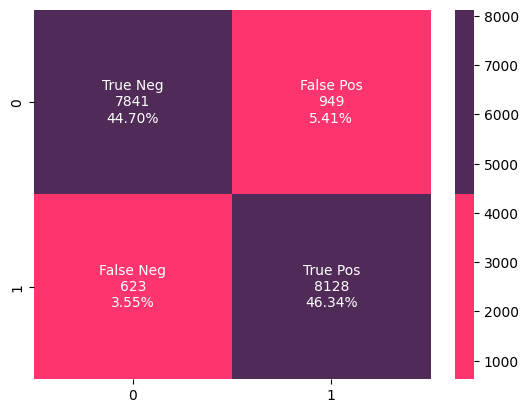

In [92]:
model_evaluation(ensemble_model, X_test, y_test)

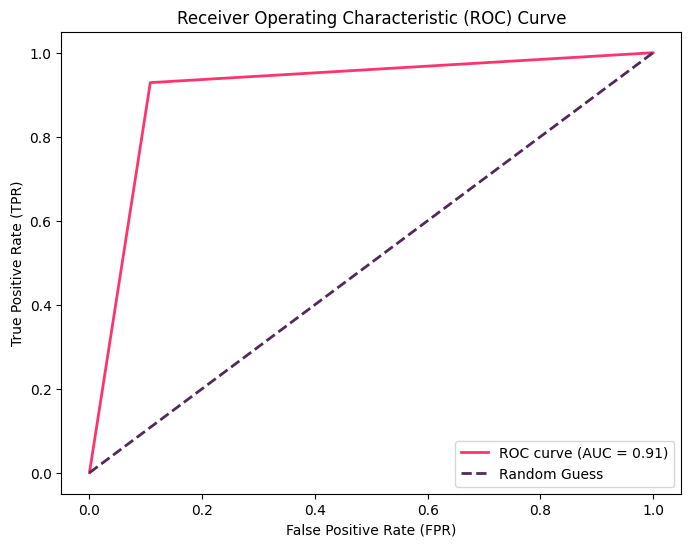

Accuracy: 0.91
Precision: 0.90
Recall: 0.93
F1 Score: 0.91


In [93]:
plot_roc_curve(y_test, ensemble_predictions)